# Loss Curves

In [10]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

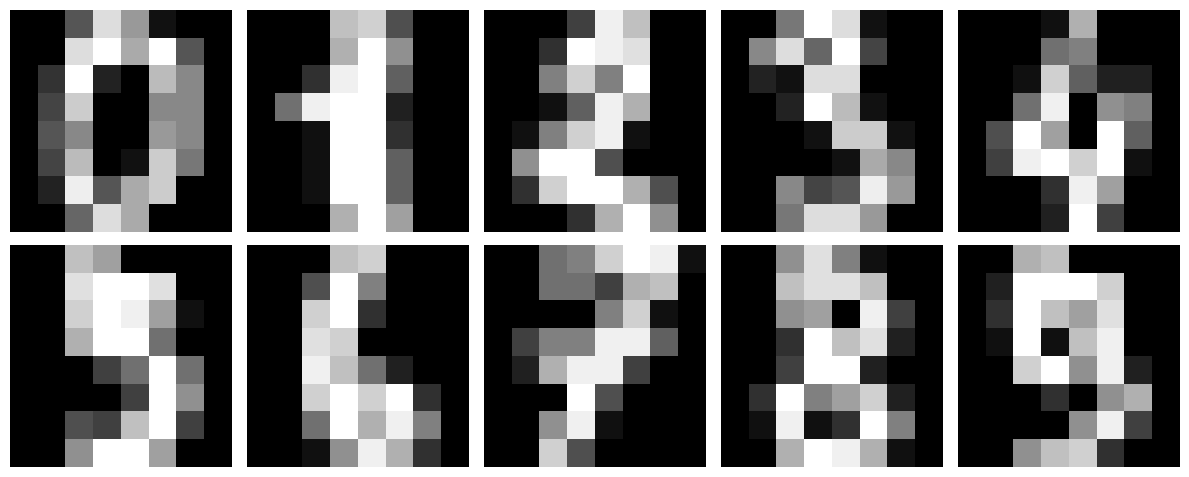

In [6]:
# Load the data
X, y = load_digits(return_X_y=True)

# Plot some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    image = X[i].reshape(8, 8)
    row_index = i // 5
    col_index = i % 5
    axes[row_index, col_index].imshow(image, cmap='gray')
    axes[row_index, col_index].axis('off')
plt.tight_layout()
plt.show()

Epoch 1/30
45/45 [==============================] - 1s 8ms/step - loss: 1.6485 - accuracy: 0.5212 - val_loss: 0.8929 - val_accuracy: 0.8222
Epoch 2/30
45/45 [==============================] - 0s 6ms/step - loss: 0.6115 - accuracy: 0.8866 - val_loss: 0.4329 - val_accuracy: 0.9139
Epoch 3/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3316 - accuracy: 0.9429 - val_loss: 0.2828 - val_accuracy: 0.9444
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.2215 - accuracy: 0.9631 - val_loss: 0.2115 - val_accuracy: 0.9583
Epoch 5/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1653 - accuracy: 0.9722 - val_loss: 0.1716 - val_accuracy: 0.9611
Epoch 6/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1291 - accuracy: 0.9833 - val_loss: 0.1506 - val_accuracy: 0.9639
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1044 - accuracy: 0.9868 - val_loss: 0.1341 - val_accuracy: 0.9639
Epoch 8/30
45/45 [==

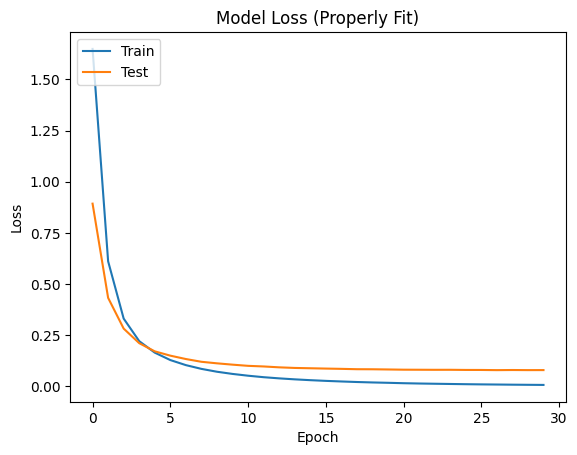

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple MLP
input_size = 64
hidden_size = 128
output_size = 10
model = models.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    layers.Dense(output_size)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Properly Fit)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [29]:
# Create a simple MLP
input_size = 64
hidden_size = 128
output_size = 10
model = models.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(hidden_size, activation='relu', input_shape=(hidden_size,)),
    layers.Dense(output_size)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Overfitting)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Epoch 1/50
45/45 [==============================] - 1s 15ms/step - loss: 1.3024 - accuracy: 0.5894 - val_loss: 0.3890 - val_accuracy: 0.8806
Epoch 2/50
45/45 [==============================] - 0s 9ms/step - loss: 0.2840 - accuracy: 0.9228 - val_loss: 0.2786 - val_accuracy: 0.9222
Epoch 3/50
45/45 [==============================] - 0s 8ms/step - loss: 0.1165 - accuracy: 0.9680 - val_loss: 0.1767 - val_accuracy: 0.9389
Epoch 4/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0672 - accuracy: 0.9784 - val_loss: 0.1458 - val_accuracy: 0.9556
Epoch 5/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0415 - accuracy: 0.9889 - val_loss: 0.1780 - val_accuracy: 0.9472
Epoch 6/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0467 - accuracy: 0.9847 - val_loss: 0.2201 - val_accuracy: 0.9417
Epoch 7/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.1924 - val_accuracy: 0.9583
Epoch 8/50
45/45 [=